<a href="https://colab.research.google.com/github/BassamTar99/Employee_Database/blob/main/Copy_of_Hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mojtaba142_hotel_booking_path = kagglehub.dataset_download('mojtaba142/hotel-booking')

print('Data source import complete.')


Data source import complete.


**This database is taken from the following article:**
    
**Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.**

**Imports**

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1-Reading dataset**

In [11]:
df=pd.read_csv(r"/content/hotel_booking.csv")

Column Names:

In [14]:
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

Handling Missing Values

In [15]:
df['children'].fillna(df['children'].median(), inplace=True)


<ipython-input-15-bd998a0af1f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(df['children'].median(), inplace=True)


In [16]:
df['agent'].fillna(-1, inplace=True)


<ipython-input-16-aba9186da420>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(-1, inplace=True)


In [17]:
df['company'].fillna(-1, inplace=True)

<ipython-input-17-f055317b34c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna(-1, inplace=True)


In [36]:

df['country'].fillna('Unknown', inplace=True)


<ipython-input-36-134cfa026243>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


Missing Values:

In [21]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Handle Duplicates:

In [23]:
df.drop_duplicates(inplace=True)

Duplicates after removal

In [22]:
print({df.duplicated().sum()})

{0}


Adding new feature

In [24]:
df['total_guests']= df['adults'] + df['children'] + df['babies']

In [25]:
df['Adr_per_person']= df['adr']/df['total_guests']

Statistics:

In [26]:
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [27]:
df.groupby('hotel')['adr'].agg(['mean','median','std']).reset_index()

,hotel,mean,median,std
0,City Hotel,105.304465,99.9,43.602954
1,Resort Hotel,94.952930,75.0,61.442418


Histogram

<Axes: xlabel='adr', ylabel='Count'>

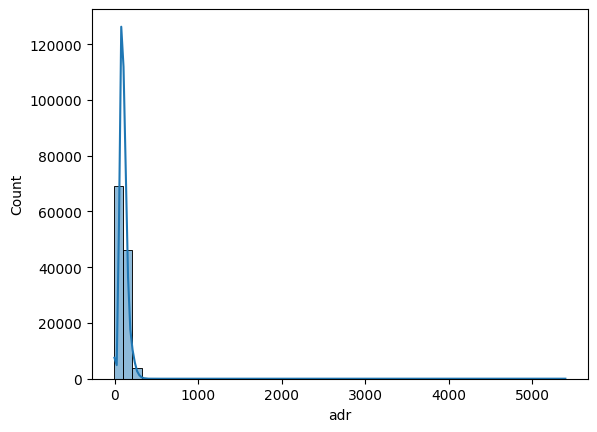

In [28]:
sns.histplot(df['adr'], bins=50, kde=True)

Text(0.5, 1.0, 'ADR Distribution')

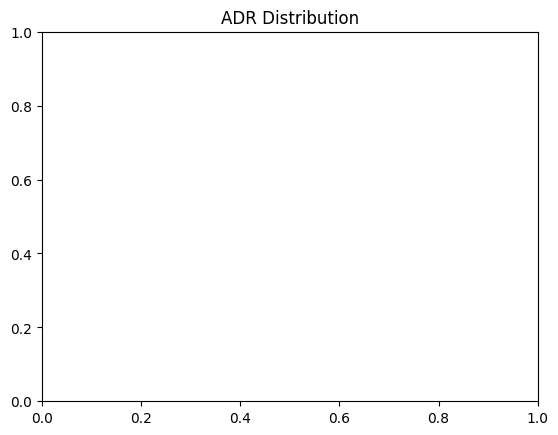

In [29]:
plt.title("ADR Distribution")

In [30]:
plt.show()

Corr Heatmap

In [31]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: >

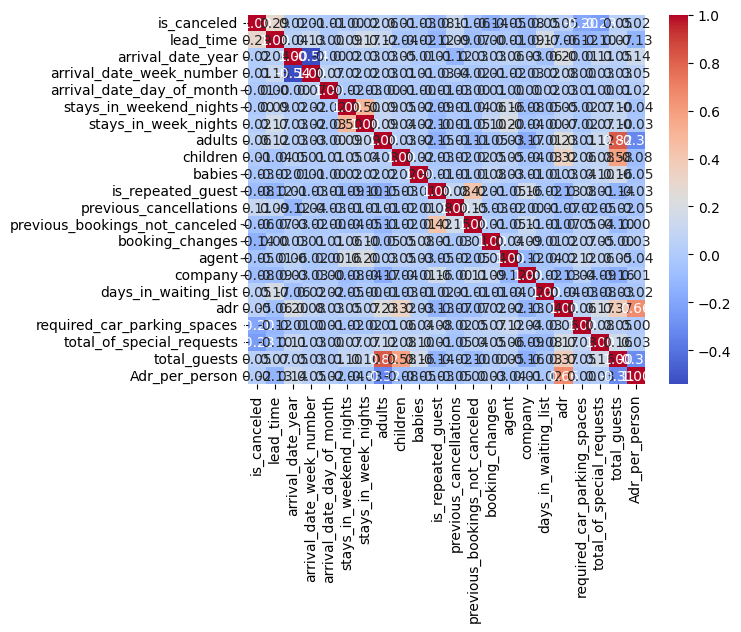

In [35]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")

Text(0.5, 1.0, 'Correlation Heatmap')

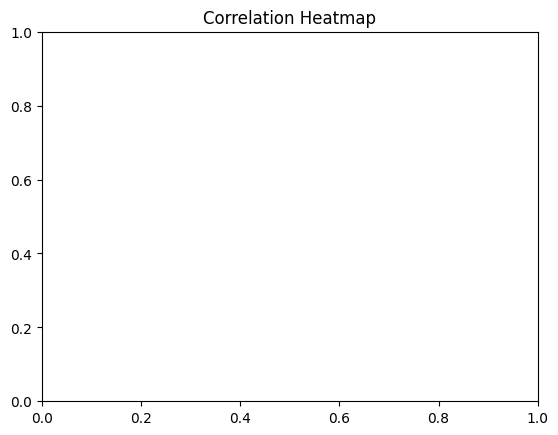

In [33]:
plt.title("Correlation Heatmap")

In [32]:
plt.show()

**2-Check basic database information.**

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

**Finished**